# 1. Marker reference
matplotlib은 플롯 명령의 marker 매개변수를 사용하여 선택하는 여러가지 마커 카테고리를 지원합니다.
- 빈 마커
- 채워진 마커
- TeX 심볼에서 생성된 마커
- 경로에서 생성된 마커

In [1]:
from matplotlib.markers import MarkerStyle
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.transforms import Affine2D

text_style = dict(horizontalalignment = 'right', verticalalignment = 'center',
                  fontsize = 12, fontfamily = 'monospace')
marker_style = dict(linestyle = ':', color = '0.8', markersize = 10,
                    markerfacecolor = 'tab:blue', markeredgecolor = 'tab:blue')

# 주어진 축을 서식화
def format_axes(ax):
    ax.margins(0.2) # 축의 여백
    ax.set_axis_off() # 축 비활성화
    ax.invert_yaxis() # y축의 방향을 뒤집음

# 주어진 리스트를 두 개의 리스트로 나눔
def split_list(a_list):
    i_half = len(a_list) // 2
    return a_list[:i_half], a_list[i_half:]

- **horizontalalignment**: 가로 정렬
- **verticalalignment**: 세로 정렬
- **markerfacecolor**: 마커 내부의 색상
- **markeredgecolor**: 마커 주위의 선의 색상

## 1-1. Unfilled markers

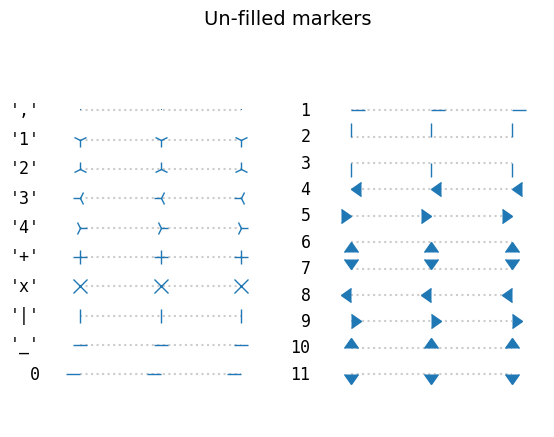

In [2]:
fig, axs = plt.subplots(ncols = 2)
fig.suptitle('Un-filled markers', fontsize = 14)

# Filter out filled markers and marker settings that do nothing.
unfilled_markers = [m for m, func in Line2D.markers.items()
                    if func != 'nothing' and m not in Line2D.filled_markers]
for ax, markers in zip(axs, split_list(unfilled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, repr(marker), **text_style)
        ax.plot([y] * 3, marker = marker, **marker_style)
    format_axes(ax)

## 1.2 Filled markers

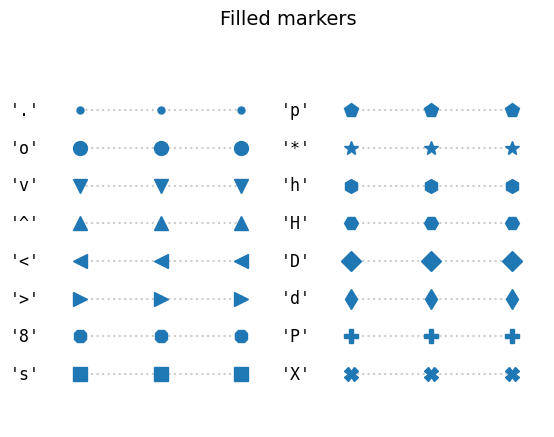

In [4]:
fig, axs = plt.subplots(ncols = 2)
fig.suptitle('Filled markers', fontsize = 14)
for ax, markers in zip(axs, split_list(Line2D.filled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, repr(marker), **text_style)
        ax.plot([y] * 3, marker = marker, **marker_style)
    format_axes(ax)

## 1-3. Marker fill styles
채워진 마커의 테두리 색상과 채우기 색상은 개별적으로 지정할 수 있습니다. 또한, 채우기 스타일은 빈 스타일, 완전히 채워진 스타일 또는 다양한 방향으로 반채워진 스타일로 구성할 수 있습니다. 반채워진 스타일은 markerfacecoloralt를 보조 채우기 색상으로 사용합니다.

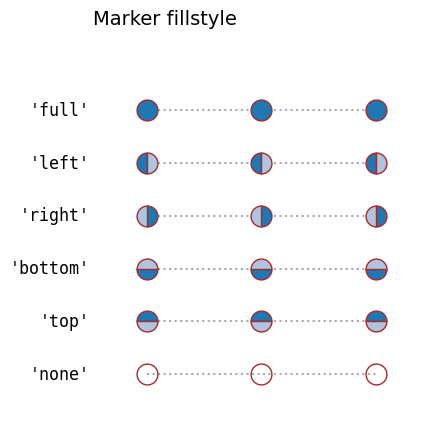

In [5]:
fig, ax = plt.subplots()
fig.suptitle('Marker fillstyle', fontsize = 14)
fig.subplots_adjust(left = 0.4)

filled_marker_style = dict(marker = 'o', linestyle = ':', markersize = 15,
                           color = 'darkgrey',
                           markerfacecolor = 'tab:blue',
                           markerfacecoloralt = 'lightsteelblue',
                           markeredgecolor = 'brown')

for y, fill_style in enumerate(Line2D.fillStyles):
    ax.text(-0.5, y, repr(fill_style), ** text_style)
    ax.plot([y] * 3, fillstyle = fill_style, **filled_marker_style)
format_axes(ax)

## 1-4. Markers created from TeX symbols
MathText를 사용하여 "$\u266B$"와 같은 사용자 정의 마커 심볼을 사용할 수 있습니다.

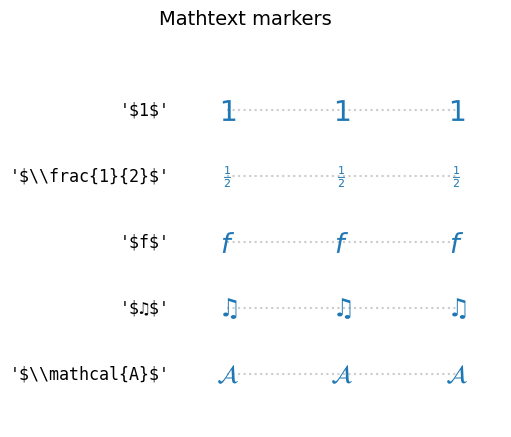

In [6]:
fig, ax = plt.subplots()
fig.suptitle('Mathtext markers', fontsize = 14)
fig.subplots_adjust(left = 0.4)

marker_style.update(markeredgecolor = "none", markersize = 15)
markers = ["$1$", r"$\frac{1}{2}$", "$f$", "$\u266B$", r"$\mathcal{A}$"]

for y, marker in enumerate(markers):
    # Escape dollars so that the text is written "as is", not as mathtext.
    ax.text(-0.5, y, repr(marker).replace("$", r"\$"), **text_style)
    ax.plot([y] * 3, marker = marker, **marker_style)
format_axes(ax)

## 1-5. Markers created from Paths
어떤 경로(Path)든 마커로 사용할 수 있습니다. 밑의 예제에서 별과 원의 두 가지 간단한 경로와 별을 자른 원의 복잡한 경로를 보여줍니다.

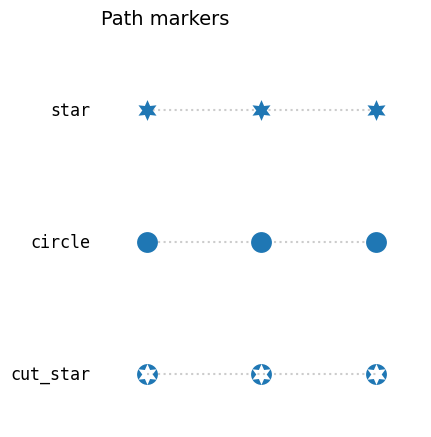

In [7]:
import matplotlib.path as mpath
import numpy as np

star = mpath.Path.unit_regular_star(6)
circle = mpath.Path.unit_circle()
# concatenate the circle with an interval cutout of the star
cut_star = mpath.Path(
    vertices = np.concatenate([circle.vertices, star.vertices[::-1, ...]]),
    codes = np.concatenate([circle.codes, star.codes])
)

fig, ax = plt.subplots()
fig.suptitle('Path markers', fontsize = 14)
fig.subplots_adjust(left = 0.4)

markers = {'star': star, 'circle': circle, 'cut_star': cut_star}

for y, (name, marker) in enumerate(markers.items()):
    ax.text(-0.5, y, name, **text_style)
    ax.plot([y] * 3, marker = marker, **marker_style)
format_axes(ax)

## 1-6. Advanced marker modifications with transform
마커는 MarkerStyle 생성자에 변환을 전달하여 수정할 수 있습니다. 다음 예제는 지정된 회전이 여러 마커 모양에 적용되는 방법을 보여줍니다.

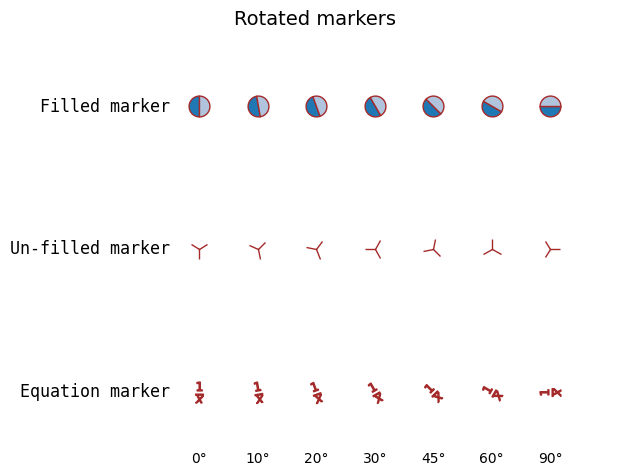

In [8]:
common_style = {k: v for k, v in filled_marker_style.items() if k != 'marker'}
angles = [0, 10, 20, 30, 45, 60, 90]

fig, ax = plt.subplots()
fig.suptitle('Rotated markers', fontsize = 14)

ax.text(-0.5, 0, 'Filled marker', **text_style)
for x, theta in enumerate(angles):
    t = Affine2D().rotate_deg(theta)
    ax.plot(x, 0, marker = MarkerStyle('o', 'left', t), **common_style)

ax.text(-0.5, 1, 'Un-filled marker', **text_style)
for x, theta in enumerate(angles):
    t = Affine2D().rotate_deg(theta)
    ax.plot(x, 1, marker = MarkerStyle('1', 'left', t), **common_style)

ax.text(-0.5, 2, 'Equation marker', **text_style)
for x, theta in enumerate(angles):
    t = Affine2D().rotate_deg(theta)
    eq = r'$\frac{1}{x}$'
    ax.plot(x, 2, marker = MarkerStyle(eq, 'left', t), **common_style)

for x, theta in enumerate(angles):
    ax.text(x, 2.5, f"{theta}°", horizontalalignment = "center")
format_axes(ax)

fig.tight_layout()

## 1-7. Setting marker cap style and join style
마커에는 기본 캡 스타일과 조인 스타일이 있지만, MarkerStyle을 생성할 때 이를 사용자 정의할 수 있습니다.

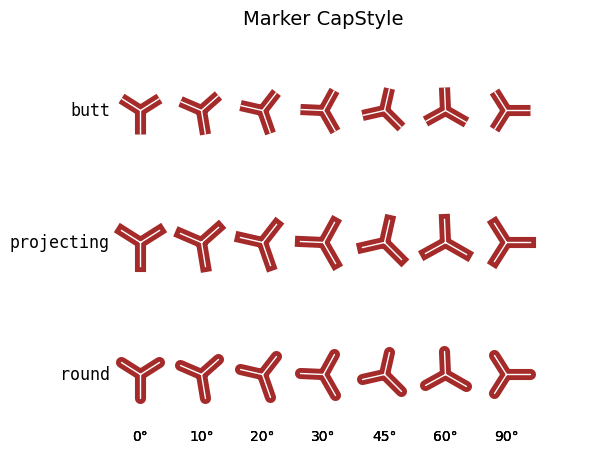

In [9]:
from matplotlib.markers import JoinStyle, CapStyle

marker_inner = dict(markersize = 35,
                    markerfacecolor = 'tab:blue',
                    markerfacecoloralt = 'lightsteelblue',
                    markeredgecolor = 'brown',
                    markeredgewidth = 8,)

marker_outer = dict(markersize = 35,
                    markerfacecolor = 'tab:blue',
                    markerfacecoloralt = 'lightsteelblue',
                    markeredgecolor = 'white',
                    markeredgewidth = 1)

fig, ax = plt.subplots()
fig.suptitle('Marker CapStyle', fontsize = 14)
fig.subplots_adjust(left = 0.1)

for y, cap_style in enumerate(CapStyle):
    ax.text(-0.5, y, cap_style.name, **text_style)
    for x, theta in enumerate(angles):
        t = Affine2D().rotate_deg(theta)
        m = MarkerStyle('1', transform = t, capstyle = cap_style)
        ax.plot(x, y, marker = m, **marker_inner)
        ax.plot(x, y, marker = m, **marker_outer)
        ax.text(x, len(CapStyle) - .5, f'{theta}°', ha = 'center')
format_axes(ax)

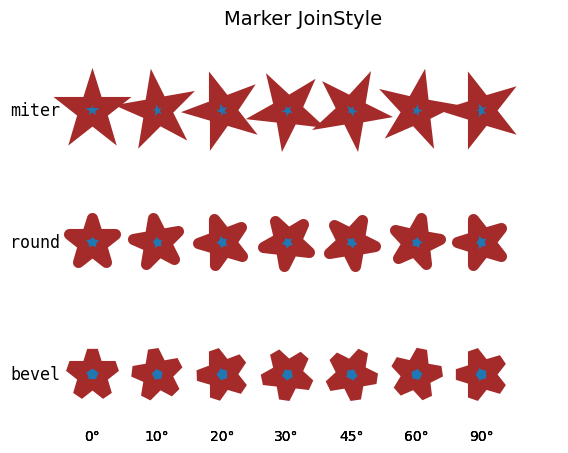

In [10]:
# Join Style
fig, ax = plt.subplots()
fig.suptitle('Marker JoinStyle', fontsize = 14)
fig.subplots_adjust(left = 0.05)

for y, join_style in enumerate(JoinStyle):
    ax.text(-0.5, y, join_style.name, **text_style)
    for x, theta in enumerate(angles):
        t = Affine2D().rotate_deg(theta)
        m = MarkerStyle('*', transform = t, joinstyle = join_style)
        ax.plot(x, y, marker = m, **marker_inner)
        ax.text(x, len(JoinStyle) - .5, f'{theta}°', ha = 'center')
format_axes(ax)

plt.show()

# 2. Markevery Demo
Line2D의 markevery 속성은 데이터 포인트의 하위 집합에서 마커를 그릴 수 있게 합니다. 가능한 매개변수 목록은 Line2D.set_markevery에서 지정됩니다.
- 단일 정수 N은 N번째 마커마다 그립니다.
- 정수의 튜플 (start, N)은 데이터 인덱스 start부터 시작하여 N번째 마커마다 그립니다.
- 정수의 리스트는 지정된 인덱스에 마커를 그립니다.
- 슬라이스는 슬라이스된 인덱스에 마커를 그립니다.
- 부동 소수점은 마커 사이의 거리를 화면 공간에서 Axes 대각선의 일부로 지정합니다. 이렇게 하면 축척 및 확대/축소에 관계없이 라인을 따라 시각적으로 균일하게 점이 분포됩니다.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# define a list of markevery cases to plot
cases = [
    None,
    8,
    (30, 8),
    [16, 24, 32],
    [0, -1],
    slice(100, 200, 3),
    0.1,
    0.4,
    (0.2, 0.4)
]

# data points
delta = 0.11
x = np.linspace(0, 10 - 2 * delta, 200) + delta
y = np.sin(x) + 1.0 + delta

## 2-1. markevery with linear scales

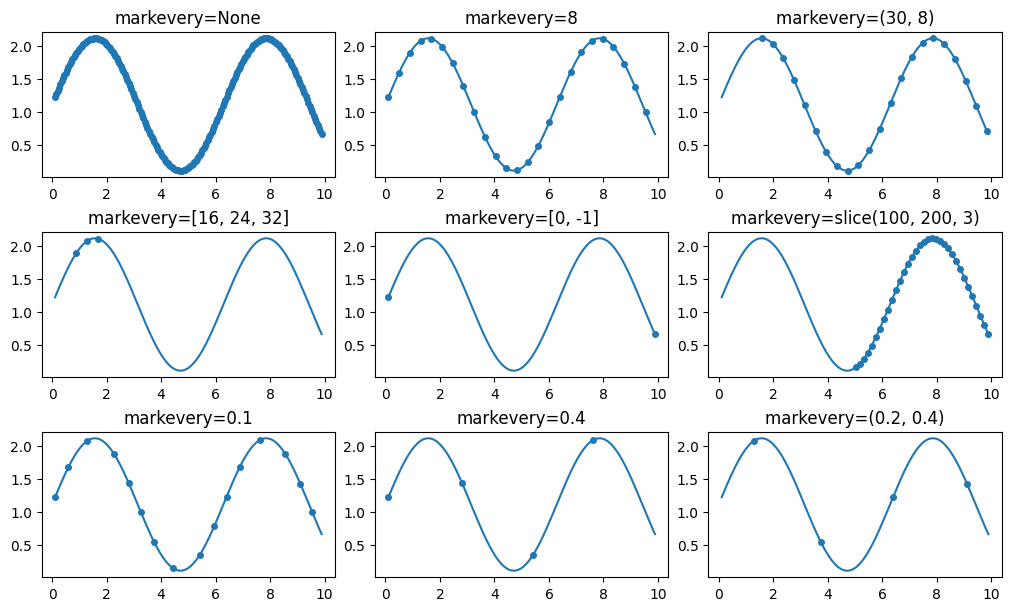

In [13]:
fig, axs = plt.subplots(3, 3, figsize = (10, 6), layout = 'constrained')
for ax, markevery in zip(axs.flat, cases):
    ax.set_title(f'markevery={markevery}')
    ax.plot(x, y, 'o', ls = '-', ms = 4, markevery = markevery)

## 2-2. markevery with log scales
로그 스케일은 정수를 사용하여 데이터를 하위 샘플링할 때 마커 간격에 시각적인 비대칭성을 유발합니다. 반면, 그림 크기의 분수를 사용하여 하위 샘플링하는 경우에는 데이터 좌표나 데이터 인덱스가 아닌 Axes 대각선의 분수에 기반하여 균일한 분포가 생성됩니다.

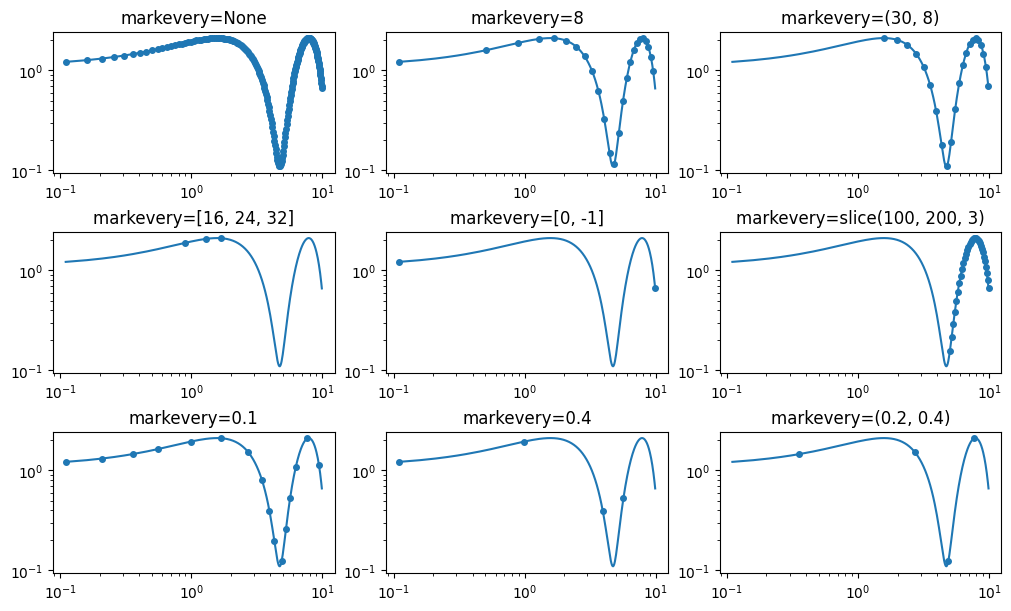

In [14]:
fig, axs = plt.subplots(3, 3, figsize = (10, 6), layout = 'constrained')
for ax, markevery in zip(axs.flat, cases):
    ax.set_title(f'markevery={markevery}')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(x, y, 'o', ls = '-', ms = 4, markevery = markevery)

## 2-3. markevery on zoomed plots
정수 기반의 markevery 사양은 기저 데이터에서 포인트를 선택하여, 보기와는 독립적입니다. 반면에, 부동 소수점 기반의 사양은 Axes 대각선과 관련이 있습니다. 축척 변경은 Axes 대각선을 변경하지 않지만, 표시된 데이터 범위를 변경하며, 확대/축소할 때 더 많은 포인트가 표시됩니다.

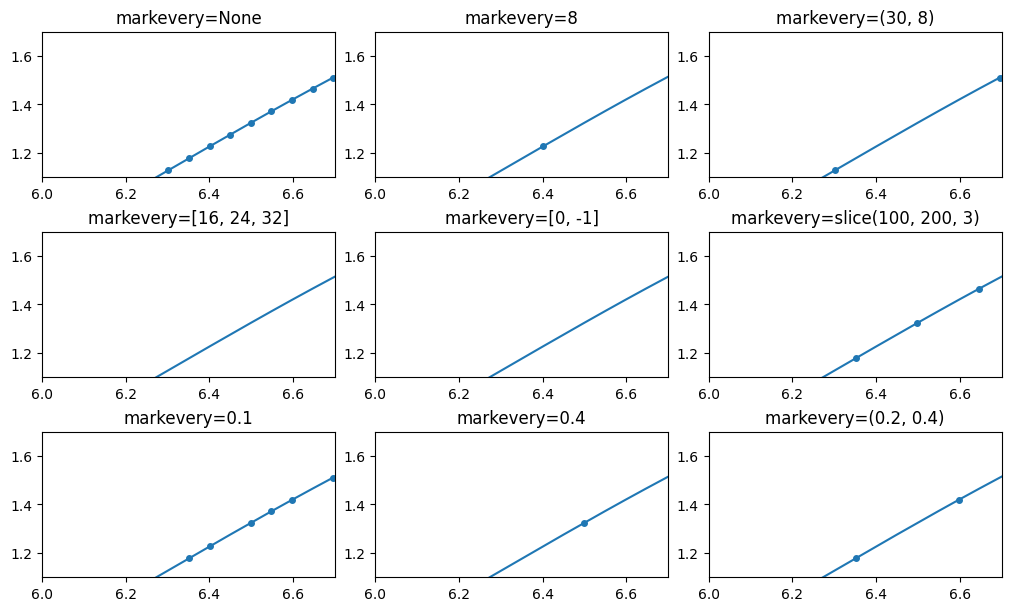

In [15]:
fig, axs = plt.subplots(3, 3, figsize = (10, 6), layout = 'constrained')
for ax, markevery in zip(axs.flat, cases):
    ax.set_title(f'markevery={markevery}')
    ax.plot(x, y, 'o', ls = '-', ms = 4, markevery = markevery)
    ax.set_xlim((6, 6.7))
    ax.set_ylim((1.1, 1.7))

## 2-4. markevery on polar plots

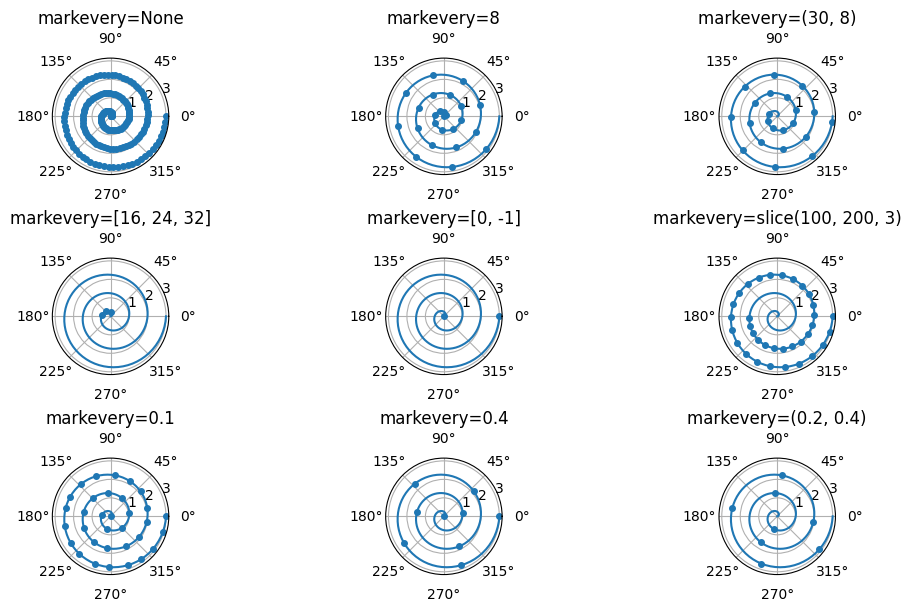

In [16]:
r = np.linspace(0, 3.0, 200)
theta = 2 * np.pi * r

fig, axs = plt.subplots(3, 3, figsize = (10, 6), layout = 'constrained',
                        subplot_kw = {'projection': 'polar'})

for ax, markevery in zip(axs.flat, cases):
    ax.set_title(f'markevery={markevery}')
    ax.plot(theta, r, 'o', ls = '-', ms = 4, markevery = markevery)

plt.show()